# Capstone Project - The Battle of Neighborhoods (Week 1)

### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analyzing the data](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Traveling tips <a name="introduction"></a>  

According to surveys conducted in 2019, Brazilian tourism has grown significantly. Currently, Brazil is a popular destination for its culture, food, paradisiacal beaches and especially the carnival festival full of samba music, great costumes and a lot of fun. 
So, let's suppose we have a travel company and want to make a sales promotion on trip packages to certain tourist towns. But you are new in the business and you do not know what are the best places to go in each tourist town. 

The first promotion package that you want to promote, is to the capital of Rio de Janeiro, located in Brazil. So, in this project we will try to figure it out the best and popular venues that you must go when you are visiting Rio. 
Here, we are interested not only in restaurants but parks, attractions and trending spots in order to generate a few interesting spots for you to visit when you are traveling to Rio de Janeiro.

This report contain various venues tips and will be target for both travel agencies and travelers.
Notice that you can easily alter the city and discover new venues whatever the stakeholder wants. I only chose Rio de Janeiro because I think it is a wonderful destination with a lot of interesting things to do.

So, let's get started! ;)

## Data <a name="data"></a>

Doing some research about neighborhoods in the stated location, I found that, according to [Culture Trip](https://theculturetrip.com/south-america/brazil/articles/the-10-coolest-neighbourhoods-in-rio-de-janeiro/ "Culture Trip"), the 10 Coolest Neighbourhoods in Rio de Janeiro are:

<ol>
 <li>Copacabana</li>
 <li>Santa Teresa</li>
 <li>Ipanema</li>
 <li>Lapa</li>
 <li>Leblon</li>
 <li>Urca</li>
 <li>Lagoa</li>
 <li>Jardim Botanico</li>
 <li>Centro </li>
 <li>Botafogo </li>
</ol>

So, using a list composed of the top 10 coolest neighbourhoods in Rio, we will use the Foursquare API to look for the trending venues in the above mentioned neighbourhoods. After the request, this data set will comprise a diversity of venues classified by categories and their ratings.

We will also use geopy to get the latitude and longitude for the above neighbourhoods and the visualize it with folium.

But first, let's import some libraries that we will need ahead.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


Now, just for a reminder, let's use geolocator to find the geographical coordinates and sees where Rio de Janeiro is located on the map.

In [2]:
address = 'Rio de Janeiro, Brazil'

geolocator = Nominatim(user_agent="brazil")
location = geolocator.geocode(address)
latituderj = location.latitude
longituderj = location.longitude
print('The geographical coordinates of Rio de Janeiro are: Latitude {}, and Longitude {}.'.format(latituderj, longituderj))
map_rj = folium.Map(location=[latituderj, longituderj], zoom_start=13)
map_rj

The geographical coordinates of Rio de Janeiro are: Latitude -22.9110137, and Longitude -43.2093727.


If you are seeing this notebook from github here is a print of the map generated

<img src="mapRio.png">

Now, let's create the data frame with the required neighbouhoods and its correspondent latitude and longitude values using geolocator.

In [3]:
neighbourhoods = {'Neighbourhood': ['Copacabana','Santa Teresa', 'Ipanema', 'Lapa','Leblon','Urca', 'Lagoa','Jardim Botanico', 'Centro', 'Botafogo']}
labels = ['Neighbourhood']
df = pd.DataFrame.from_records(neighbourhoods,columns=labels)

latitude = []
longitude = []

for address in df['Neighbourhood']:

    geolocator = Nominatim(user_agent="Brazil")
    location = geolocator.geocode(address)
    latitude.append(location.latitude)
    longitude.append(location.longitude)
    
df['latitude'] = latitude
df['longitude'] = longitude
df

,Neighbourhood,latitude,longitude
0,Copacabana,-22.971964,-43.184343
1,Santa Teresa,-22.921399,-43.188214
2,Ipanema,-22.983956,-43.202216
3,Lapa,-13.250571,-43.410754
4,Leblon,-22.983556,-43.224938
5,Urca,46.548852,23.961872
6,Lagoa,37.132581,-8.455051
7,Jardim Botanico,-22.968385,-43.228694
8,Centro,47.549025,1.732406
9,Botafogo,-22.948845,-43.179829


Notice that the neighbourhoods 'Lapa', 'Urca', 'Lagoa' and 'Centro' received the wrong geographical coordinates, so I changed them manually in the df as shown below.

In [30]:
#Lapa
df['latitude'].replace({-13.250571: -22.9136},inplace=True)
df['longitude'].replace({-43.410754: -43.1817},inplace=True)
#Urca
df['latitude'].replace(to_replace = 46.548852, value= -22.9528578552)
df['longitude'].replace({23.961872: -43.1599343603})
#Lagoa
df['latitude'].replace({37.132581: -22.97633})
df['longitude'].replace({-8.455051: -43.20966}) 
#Centro
df['latitude'].replace({47.549025: -22.9035})
df['longitude'].replace({1.732406: -43.2096})
df

,Neighbourhood,latitude,longitude
0,Copacabana,-22.971964,-43.184343
1,Santa Teresa,-22.921399,-43.188214
2,Ipanema,-22.983956,-43.202216
3,Lapa,-22.913600,-43.181700
4,Leblon,-22.983556,-43.224938
7,Jardim Botanico,-22.968385,-43.228694
9,Botafogo,-22.948845,-43.179829


As I have no idea why replace function only work for Lapa, I drop some rows and create manually a new df_Rio

In [117]:
#df.drop([5,6,8],inplace=True)

df2 = pd.DataFrame({"Neighbourhood":['Urca', 'Lagoa', 'Centro'],
                    "latitude":[-22.9528578552, -22.97633, -22.907],
                    "longitude": [-43.1599343603,-43.20966,-43.1819]})


df_Rio = df.append(df2, ignore_index = True) 

df_Rio

,Neighbourhood,latitude,longitude
0,Copacabana,-22.971964,-43.184343
1,Santa Teresa,-22.921399,-43.188214
2,Ipanema,-22.983956,-43.202216
3,Lapa,-22.913600,-43.181700
4,Leblon,-22.983556,-43.224938
5,Jardim Botanico,-22.968385,-43.228694
6,Botafogo,-22.948845,-43.179829
7,Urca,-22.952858,-43.159934
8,Lagoa,-22.976330,-43.209660
9,Centro,-22.907000,-43.181900


Now let's update de Rio de Janeiro map with the neighbourhoods.

In [32]:
map_rj = folium.Map(location=[latituderj, longituderj], zoom_start=11.5)

# add markers to map
for label, lat, lng in zip(df_Rio['Neighbourhood'], df_Rio['latitude'], df_Rio['longitude']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_rj)  
    
map_rj

If you are seeing this notebook from github here is a print of the map generated

<img src="mapRio2.png">

## Foursquare API

Now that we have the coordinates of each neighbourhood of interest, let's use Foursquare API to get info from those venues.

In [7]:
CLIENT_ID = 'DH4TQH3EWR0BHBFBB2YJFBTH4CEOM3N5HN2QZM53ISAU0OML' # your Foursquare ID
CLIENT_SECRET = 'W4HAAL2RMJ1SSXKIX43Y0TNSUSOYAZ5UZTTIEVKXQRBQST1Y' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DH4TQH3EWR0BHBFBB2YJFBTH4CEOM3N5HN2QZM53ISAU0OML
CLIENT_SECRET:W4HAAL2RMJ1SSXKIX43Y0TNSUSOYAZ5UZTTIEVKXQRBQST1Y


 Exploring the 1st neighbourhood in the data frame, just to have an idea of how many data we have, by getting the trending venues that are in this neighboourhood.

In [8]:
lat_n = df_Rio.loc[0, 'latitude']
lon_n = df_Rio.loc[0, 'longitude']
print("The longitude and Latitude of",df_Rio.loc[0, 'Neighbourhood'],"are, respectively,", lat_n,"and",lon_n,"." )

The longitude and Latitude of Copacabana are, respectively, -22.9719642 and -43.1843432 .


In [9]:
#getting the trending venues in Copacabana
url_ = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(
    CLIENT_ID, CLIENT_SECRET, lat_n, lon_n, VERSION)

# send GET request and get trending venues
results = requests.get(url_).json()
results

{'meta': {'code': 200, 'requestId': '5fd785b8e8e116439259bfa9'},
 'response': {'venues': []}}

#### As the trending venues endpoint is not returning anything for any neighbourhood in Rio and I could not figure it out why, I will use the explore endpoint as in the labs to get venue recommendations from Foursquare API.

In [10]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat_n, 
    lon_n, 
    500, 
    10)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=DH4TQH3EWR0BHBFBB2YJFBTH4CEOM3N5HN2QZM53ISAU0OML&client_secret=W4HAAL2RMJ1SSXKIX43Y0TNSUSOYAZ5UZTTIEVKXQRBQST1Y&v=20180604&ll=-22.9719642,-43.1843432&radius=500&limit=10'

Sending the GET request and examine the resutls

In [11]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fd785b9abab313313498240'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Copacabana',
  'headerFullLocation': 'Copacabana, Rio de Janeiro',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 127,
  'suggestedBounds': {'ne': {'lat': -22.967464195499993,
    'lng': -43.179464713729224},
   'sw': {'lat': -22.976464204500004, 'lng': -43.18922168627078}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b2ff8faf964a520a8f324e3',
       'name': 'Praia de Copacabana',
       'location': {'address': 'Av. Atlântica',
        'lat': -22.972440508299723,
        'lng': -43.18343639373779,
        'labeledLatLngs': [{'label': 'display',
   

Now that we've got the top 10th recommended venues of Copacabana, and know it works, let's search the top 10 recommended venues of all neighbourhoods depicted above in a 500 meters ratio.

But first let's define a function to do it for all neighbourhoods at once:

In [53]:
def getRecommendedVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    recommended_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    recommended_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(recommended_venues)

Now let's create a new data frame with all the information that we've got

In [54]:
rio_venues = getRecommendedVenues(names=df_Rio['Neighbourhood'],
                                   latitudes=df_Rio['latitude'],
                                   longitudes=df_Rio['longitude'])

print(rio_venues.shape)
rio_venues.head()

(597, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Copacabana,-22.971964,-43.184343,Praia de Copacabana,-22.972441,-43.183436,Beach
1,Copacabana,-22.971964,-43.184343,Windsor California Hotel,-22.972704,-43.185707,Hotel
2,Copacabana,-22.971964,-43.184343,Kopenhagen,-22.970680,-43.185617,Chocolate Shop
3,Copacabana,-22.971964,-43.184343,JW Marriott Hotel Rio de Janeiro,-22.972231,-43.185842,Hotel
4,Copacabana,-22.971964,-43.184343,Barraca da Chiquita,-22.972091,-43.186736,Northeastern Brazilian Restaurant


## Methodology <a name="methodology"></a>

The main idea of this project was to get all trending venues around the coolest neighbourhoods of Rio de Janeiro city, but as the foursquare API seems not work for this endpoint, now, in this project we will explore some venues around these neighbourhoods and segment them into clusters, we are also going to  recommend two venues categories. 
It's a commom knowloedge that brazillian food has a very special spice, so we are also going to focus on explore brazilian restaurants to recommend the local food for our clients. Another good thing about Brazil is the coffee, they are good producers of this commodity, so we will explore some of them.

The fisrt step was to collect the necessary data from geolocator and from foursquare API, we now have a data frame called 'rio_venues' composed of all venues from the ten negihbourhoods we chose to explore. This data frame also contais the respective latitude and longitude from each neighbourhood and each venue togheter with their category. We also created a map using follium to show all the neighbourhoods.

Then, we are going to analyze each venue category to see which are the most commom venues in Rio, plot them and then apply k-means algorithm to segment the neighbourhoods that were chosen. A map generated by folium will be also created in order to ilustrate all the clusters that were created.

In the next step we will search for specific venues categories using the search endpoint from foursquare API in order to recomend restaurants with local food and coffee shops.

## Analyzing the data <a name="analysis"></a>

For starters let's see how many unique categories can be curated from all the returned venues and how many venues were returned for each neighbourhood

In [14]:
print('There are {} uniques categories.'.format(len(rio_venues['Venue Category'].unique())))
rio_venues.groupby('Neighbourhood').count()

There are 153 uniques categories.


,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Botafogo,45,45,45,45,45,45
Centro,92,92,92,92,92,92
Copacabana,100,100,100,100,100,100
Ipanema,100,100,100,100,100,100
Jardim Botanico,23,23,23,23,23,23
Lagoa,4,4,4,4,4,4
Lapa,70,70,70,70,70,70
Leblon,100,100,100,100,100,100
Santa Teresa,49,49,49,49,49,49


Let's see in a bar plot which are the most frequent categories in those neighbourhoods

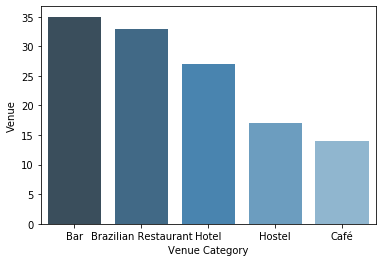

In [15]:
import seaborn as sns
plot_rio_venues = rio_venues[['Venue Category','Venue']].groupby('Venue Category').nunique().drop(columns=['Venue Category'])
plot_rio_venues =plot_rio_venues.sort_values(by=['Venue'], ascending=False)[0:5]
sns.barplot(x="Venue Category", y="Venue", data=plot_rio_venues.reset_index(), palette="Blues_d")

As we can see in the above plot, the most common venues are Bar, Brazilian restaurant and Hotel, all of them with a frequency greater than 25.

Now let's see how many venues we have on each neighbouhoord

In [16]:
rio_venues_count = rio_venues.groupby('Neighbourhood').count().reset_index()
rio_venues_count[['Neighbourhood', 'Venue']]

,Neighbourhood,Venue
0,Botafogo,45
1,Centro,92
2,Copacabana,100
3,Ipanema,100
4,Jardim Botanico,23
5,Lagoa,4
6,Lapa,70
7,Leblon,100
8,Santa Teresa,49
9,Urca,14


Now let's normalize the data in order to apply the k-means algorithm

In [17]:
# one hot encoding
rio_onehot = pd.get_dummies(rio_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
rio_onehot['Neighbourhood'] = rio_venues['Neighbourhood'] 

# move neighbourhood column to the first column
fixed_columns = [rio_onehot.columns[-1]] + list(rio_onehot.columns[:-1])
rio_onehot = rio_onehot[fixed_columns]

print("New df size: ",rio_onehot.shape)
rio_onehot.head()



New df size:  (597, 154)


,Neighbourhood,Acai House,Art Gallery,Art Museum,Arts & Crafts Store,BBQ Joint,Bakery,Bar,Bathing Area,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Cable Car,Café,Candy Store,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Dance Studio,Department Store,Dessert Shop,Diner,Dive Bar,Drugstore,Fabric Shop,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hostel,Hotel,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kitchen Supply Store,Lounge,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mountain,Movie Theater,Music Venue,Nightclub,Noodle House,Northeastern Brazilian Restaurant,Office,Paper / Office Supplies Store,Pastelaria,Pastry Shop,Pedestrian Plaza,Perfume Shop,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Pool Hall,Portuguese Restaurant,Pub,Record Shop,Resort,Restaurant,Roof Deck,Sake Bar,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restaurant,Southeastern Brazilian Restaurant,Souvenir Shop,Spa,Sporting Goods Shop,Steakhouse,Street Art,Supermarket,Supplement Shop,Sushi Restaurant,Tapas Restaurant,Tapiocaria,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Tourist Information Center,Trail,Tram Station,Used Bookstore,Vegetarian / Vegan Restaurant,Waterfall,Wings Joint,Women's Store
0,Copacabana,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Copacabana,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Copacabana,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Copacabana,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Copacabana,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now we are going to group the rows by neighborhood and bytake the mean of the frequency of occurrence of each category

In [18]:
rio_grouped = rio_onehot.groupby('Neighbourhood').mean().reset_index()
print("New df size: ",rio_grouped.shape)
rio_grouped.head()

New df size:  (10, 154)


,Neighbourhood,Acai House,Art Gallery,Art Museum,Arts & Crafts Store,BBQ Joint,Bakery,Bar,Bathing Area,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Cable Car,Café,Candy Store,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Dance Studio,Department Store,Dessert Shop,Diner,Dive Bar,Drugstore,Fabric Shop,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hostel,Hotel,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kitchen Supply Store,Lounge,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mountain,Movie Theater,Music Venue,Nightclub,Noodle House,Northeastern Brazilian Restaurant,Office,Paper / Office Supplies Store,Pastelaria,Pastry Shop,Pedestrian Plaza,Perfume Shop,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Pool Hall,Portuguese Restaurant,Pub,Record Shop,Resort,Restaurant,Roof Deck,Sake Bar,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restaurant,Southeastern Brazilian Restaurant,Souvenir Shop,Spa,Sporting Goods Shop,Steakhouse,Street Art,Supermarket,Supplement Shop,Sushi Restaurant,Tapas Restaurant,Tapiocaria,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Tourist Information Center,Trail,Tram Station,Used Bookstore,Vegetarian / Vegan Restaurant,Waterfall,Wings Joint,Women's Store
0,Botafogo,0.00,0.022222,0.00000,0.00,0.00,0.000000,0.000000,0.00,0.044444,0.00,0.00000,0.00,0.022222,0.00000,0.022222,0.022222,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.00000,0.022222,0.0,0.000000,0.00000,0.00000,0.022222,0.000000,0.022222,0.000000,0.0,0.022222,0.00,0.00,0.0,0.022222,0.022222,0.022222,0.000000,0.000000,0.000000,0.044444,0.00000,0.00000,0.00,0.00000,0.00,0.0,0.000000,0.00000,0.022222,0.00,0.044444,0.000000,0.0,0.00000,0.00,0.00,0.000000,0.0,0.0,0.00,0.00000,0.00,0.0,0.022222,0.022222,0.022222,0.00,0.044444,0.00,0.00,0.000000,0.0,0.044444,0.088889,0.044444,0.022222,0.022222,0.022222,0.00,0.022222,0.00,0.00,0.00,0.00,0.000000,0.00000,0.0,0.0,0.000000,0.044444,0.00000,0.00,0.022222,0.00,0.000000,0.000000,0.00,0.00000,0.00,0.022222,0.00000,0.00,0.000000,0.00,0.0,0.022222,0.000000,0.00,0.00,0.000000,0.00,0.0,0.00000,0.00000,0.022222,0.0,0.00,0.00000,0.00000,0.00,0.000000,0.000000,0.000000,0.0,0.022222,0.0,0.00,0.0,0.022222,0.00000,0.00000,0.0,0.00,0.0,0.0,0.0,0.0,0.022222,0.000000,0.0,0.00000,0.00,0.0,0.00000,0.022222,0.00,0.000000,0.0,0.00
1,Centro,0.00,0.021739,0.01087,0.00,0.00,0.032609,0.010870,0.00,0.000000,0.00,0.01087,0.00,0.000000,0.01087,0.010870,0.000000,0.000000,0.000000,0.152174,0.00,0.0,0.0,0.01087,0.000000,0.0,0.043478,0.01087,0.01087,0.021739,0.021739,0.000000,0.021739,0.0,0.032609,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.032609,0.021739,0.021739,0.000000,0.01087,0.01087,0.00,0.01087,0.00,0.0,0.021739,0.01087,0.000000,0.00,0.000000,0.000000,0.0,0.01087,0.00,0.00,0.000000,0.0,0.0,0.00,0.01087,0.00,0.0,0.010870,0.010870,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.010870,0.00,0.000000,0.00,0.00,0.00,0.00,0.076087,0.01087,0.0,0.0,0.021739,0.000000,0.01087,0.00,0.000000,0.00,0.021739,0.021739,0.00,0.01087,0.00,0.010870,0.01087,0.00,0.000000,0.00,0.0,0.000000,0.000000,0.00,0.00,0.021739,0.00,0.0,0.0108

Now we are going to create a df with the most frequent five venues in each neighbourhood

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
rio_venues_sorted = pd.DataFrame(columns=columns)
rio_venues_sorted['Neighbourhood'] =rio_grouped['Neighbourhood']

for ind in np.arange(rio_grouped.shape[0]):
    rio_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rio_grouped.iloc[ind, :], num_top_venues)

rio_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Botafogo,Hotel,Hostel,Ice Cream Shop,Dessert Shop,Nightclub
1,Centro,Brazilian Restaurant,Middle Eastern Restaurant,Café,Coffee Shop,Bakery
2,Copacabana,Hotel,Beach Bar,Bar,Pizza Place,Gym / Fitness Center
3,Ipanema,Bar,Pizza Place,Japanese Restaurant,Brazilian Restaurant,Food Stand
4,Jardim Botanico,Garden,Soccer Field,Historic Site,Bar,Bistro


Now we are going to cluster the neighbourhoods with k-means and create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood

In [20]:
# set number of clusters
kclusters = 5

rio_grouped_clustering = rio_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(rio_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([0, 4, 0, 0, 3, 1, 0, 0, 0, 2])

In [21]:
# add clustering labels
rio_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

rio_merged = df_Rio

# merge toronto_grouped withtoronto_data to add latitude/longitude for each neighborhood
rio_merged = rio_merged.join(rio_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

rio_merged.head() # check the last columns!

,Neighbourhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Copacabana,-22.971964,-43.184343,0,Hotel,Beach Bar,Bar,Pizza Place,Gym / Fitness Center
1,Santa Teresa,-22.921399,-43.188214,0,Bar,Brazilian Restaurant,Hotel,Plaza,Bed & Breakfast
2,Ipanema,-22.983956,-43.202216,0,Bar,Pizza Place,Japanese Restaurant,Brazilian Restaurant,Food Stand
3,Lapa,-22.913600,-43.181700,0,Hostel,Hotel,Bar,Gym / Fitness Center,Coffee Shop
4,Leblon,-22.983556,-43.224938,0,Bar,Brazilian Restaurant,Steakhouse,Gym / Fitness Center,Italian Restaurant


Let's visualize the clusters

In [119]:
# create map
map_clusters = folium.Map(location=[lat_n, lon_n], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(rio_merged['latitude'], rio_merged['longitude'], rio_merged['Neighbourhood'], rio_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

If you are seeing this notebook from github here is a print of the map generated

<img src="mapRio3.png">

Now let's see of whats kinds of venues the clusters are composed

In [23]:
print("Cluster 0")
rio_merged.loc[rio_merged['Cluster Labels'] == 0, rio_merged.columns[[0] + list(range(4, rio_merged.shape[1]))]]

Cluster 0


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Copacabana,Hotel,Beach Bar,Bar,Pizza Place,Gym / Fitness Center
1,Santa Teresa,Bar,Brazilian Restaurant,Hotel,Plaza,Bed & Breakfast
2,Ipanema,Bar,Pizza Place,Japanese Restaurant,Brazilian Restaurant,Food Stand
3,Lapa,Hostel,Hotel,Bar,Gym / Fitness Center,Coffee Shop
4,Leblon,Bar,Brazilian Restaurant,Steakhouse,Gym / Fitness Center,Italian Restaurant
6,Botafogo,Hotel,Hostel,Ice Cream Shop,Dessert Shop,Nightclub


In [24]:
print("Cluster 1")
rio_merged.loc[rio_merged['Cluster Labels'] == 1, rio_merged.columns[[0] + list(range(4, rio_merged.shape[1]))]]

Cluster 1


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8,Lagoa,Convenience Store,Spa,Food Truck,Social Club,Food Stand


In [25]:
print("Cluster 2")
rio_merged.loc[rio_merged['Cluster Labels'] == 2, rio_merged.columns[[0] + list(range(4, rio_merged.shape[1]))]]

Cluster 2


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
7,Urca,Trail,Shoe Store,Mountain,Brazilian Restaurant,Tram Station


In [26]:
print("Cluster 3")
rio_merged.loc[rio_merged['Cluster Labels'] == 3, rio_merged.columns[[0] + list(range(4, rio_merged.shape[1]))]]

Cluster 3


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,Jardim Botanico,Garden,Soccer Field,Historic Site,Bar,Bistro


In [27]:
print("Cluster 4")
rio_merged.loc[rio_merged['Cluster Labels'] == 4, rio_merged.columns[[0] + list(range(4, rio_merged.shape[1]))]]

Cluster 4


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
9,Centro,Brazilian Restaurant,Middle Eastern Restaurant,Café,Coffee Shop,Bakery


##### Well, It did not return the results I was quitting expecting. But to summarize, we can see here that we have 5 different clusters with different commom venues.

The first cluster its composed mostly with hotels, bars and restaurants. These venues are very commom in Copacabana, Santa Teresa, Ipanema,	Lapa, Leblon and Botafogo.

The second cluster its only formed with Lagoa and we have more outdoors things to do, so if we want to see the nature, this is the appropriate place for that.

In the third cluster as the most commom venue we've got a trail, so we can say this cluster is good for who wants to know other places neraby.

The fourth cluster its formed only with Jardim Botanico and also contain outdoor venues to visit.

The five cluster is composed by the down town of the city and it has a lot of cool restaurants and coffee shops.

##### Now we are going to use the search endpoint to look for local food restaurants and coffee shops.
But first lets define a new function to search for a ageneric venue from each neighbourhood and extracts its category

In [52]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [96]:
#function that get the venues from each neighbouhood
def getVenues(names, latitudes, longitudes, radius=500):
    
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        lat, lng,
        VERSION, search_query, 
        radius, 
        LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # assign relevant part of JSON to venues
        #venues_list = results['response']['venues']

        # tranform venues into a dataframe
        dataframe = json_normalize(results)
   
    
    return(dataframe)

 

Now let's search for coffee shops

In [75]:
search_query = 'coffee'
radius = 500
print(search_query + ' .... OK!')

coffee .... OK!


In [97]:
rio_coffee = getVenues(names=df_Rio['Neighbourhood'],
                                   latitudes=df_Rio['latitude'],
                                   longitudes=df_Rio['longitude'])


print(rio_coffee.shape)
rio_coffee.head()

C:\Users\cbonafin\anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


(5, 16)


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.postalCode
0,56a48b6a498e29423d33fa46,Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1607989955,False,Centro,-22.909108,-43.180282,"[{'label': 'display', 'lat': -22.9091079583458...",287,BR,Rio de Janeiro,RJ,Brasil,"[Centro, Rio de Janeiro, RJ, Brasil]",NaN
1,530e7b87498e2d1f1bf472d6,Coffee Break GPLux,"[{'id': '4bf58dd8d48988d1a1941735', 'name': 'C...",v-1607989955,False,"Av. Presidente Vargas, 534 - 17 andar",-22.901849,-43.180905,"[{'label': 'display', 'lat': -22.9018492085922...",582,BR,Rio de Janeiro,RJ,Brasil,"[Av. Presidente Vargas, 534 - 17 andar, Rio de...",NaN
2,527126ff11d2412a53327055,California Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1607989955,False,"R. do Rosário, 90",-22.902421,-43.179155,"[{'label': 'display', 'lat': -22.9024208080321...",582,BR,Rio de Janeiro,RJ,Brasil,"[R. do Rosário, 90, Rio de Janeiro, RJ, 20041-...",20041-002
3,5c40958fdab4b1002c584b73,Aussie Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1607989955,False,Rua dos Invalidos,-22.911036,-43.184877,"[{'label': 'display', 'lat': -22.911036, 'lng'...",543,BR,Rio de Janeiro,RJ,Brasil,"[Rua dos Invalidos, Rio de Janeiro, RJ, 20231-...",20231-043
4,4eef53ae93add02fce44d093,Starbucks,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1607989955,False,"R. Gonçalves Dias, 51",-22.904947,-43.178935,"[{'label': 'display', 'lat': -22.9049465047897...",380,BR,Rio de Janeiro,RJ,Brasil,"[R. Gonçalves Dias, 51, Rio de Janeiro, RJ, 20...",20050-030


Let's create a functin to clean and filter the resulting data frame

In [98]:
def clean(df):
    
    filtered_columns = ['name', 'categories'] + [col for col in df.columns if col.startswith('location.')] + ['id']
    df_filtered = df.loc[:, filtered_columns]

    # filter the category for each row
    df_filtered['categories'] = df_filtered.apply(get_category_type, axis=1)

    # clean column names by keeping only last term
    df_filtered.columns = [column.split('.')[-1] for column in df_filtered.columns]    
  
    return(df_filtered)

Now let's call the function and clean the data frame 'rio_coffee'

In [93]:
rio_coffee_clean = clean(rio_coffee)

print(rio_coffee_clean.shape)
rio_coffee_clean.head()

(5, 14)


,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,id
0,Coffee,Coffee Shop,Centro,-22.909108,-43.180282,"[{'label': 'display', 'lat': -22.9091079583458...",287,BR,Rio de Janeiro,RJ,Brasil,"[Centro, Rio de Janeiro, RJ, Brasil]",NaN,56a48b6a498e29423d33fa46
1,Coffee Break GPLux,College Cafeteria,"Av. Presidente Vargas, 534 - 17 andar",-22.901849,-43.180905,"[{'label': 'display', 'lat': -22.9018492085922...",582,BR,Rio de Janeiro,RJ,Brasil,"[Av. Presidente Vargas, 534 - 17 andar, Rio de...",NaN,530e7b87498e2d1f1bf472d6
2,California Coffee,Coffee Shop,"R. do Rosário, 90",-22.902421,-43.179155,"[{'label': 'display', 'lat': -22.9024208080321...",582,BR,Rio de Janeiro,RJ,Brasil,"[R. do Rosário, 90, Rio de Janeiro, RJ, 20041-...",20041-002,527126ff11d2412a53327055
3,Aussie Coffee,Coffee Shop,Rua dos Invalidos,-22.911036,-43.184877,"[{'label': 'display', 'lat': -22.911036, 'lng'...",543,BR,Rio de Janeiro,RJ,Brasil,"[Rua dos Invalidos, Rio de Janeiro, RJ, 20231-...",20231-043,5c40958fdab4b1002c584b73
4,Starbucks,Coffee Shop,"R. Gonçalves Dias, 51",-22.904947,-43.178935,"[{'label': 'display', 'lat': -22.9049465047897...",380,BR,Rio de Janeiro,RJ,Brasil,"[R. Gonçalves Dias, 51, Rio de Janeiro, RJ, 20...",20050-030,4eef53ae93add02fce44d093


We've got five coffee shops shown below around the searched neighbouhoods, but before we can visualize them, let's do the same thing to brazilian restaurants

In [99]:
rio_coffee_clean.name

0                Coffee
1    Coffee Break GPLux
2     California Coffee
3         Aussie Coffee
4             Starbucks
Name: name, dtype: object

In [112]:
search_query =  'brazilian restaurant'
radius = 500

rio_rest = getVenues(names=df_Rio['Neighbourhood'],
                           latitudes=df_Rio['latitude'],
                           longitudes=df_Rio['longitude'])


print(rio_rest.shape)

rio_br_clean = clean(rio_rest)

print(rio_br_clean.shape)
rio_br_clean.head()


C:\Users\cbonafin\anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


(50, 18)
(50, 16)


,name,categories,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,city,state,address,postalCode,crossStreet,neighborhood,id
0,restaurante Broto da Terra,None,-22.906915,-43.181803,"[{'label': 'display', 'lat': -22.9069146175121...",13,BR,Brasil,[Brasil],NaN,NaN,NaN,NaN,NaN,NaN,4e7ca24eb993baf70a0cad60
1,1st World Congress of the Brazilian Academy of...,Conference,-22.905651,-43.181627,"[{'label': 'display', 'lat': -22.905651, 'lng'...",152,BR,Brasil,"[Rio de Janeiro, RJ, Brasil]",Rio de Janeiro,RJ,NaN,NaN,NaN,NaN,5def9109752a990008593a3c
2,Restaurante Boa Mesa,Brazilian Restaurant,-22.907650,-43.181557,"[{'label': 'display', 'lat': -22.9076498702768...",80,BR,Brasil,"[R. Silva Jardim, 32, Rio de Janeiro, RJ, 2005...",Rio de Janeiro,RJ,"R. Silva Jardim, 32",20050-060,NaN,NaN,4ed3f7558231b9ef8cba1db2
3,Restaurante Promoção,Brazilian Restaurant,-22.907577,-43.181539,"[{'label': 'display', 'lat': -22.9075771723851...",74,BR,Brasil,"[Rua Luís De Camões, Rio de Janeiro, RJ, Brasil]",Rio de Janeiro,RJ,Rua Luís De Camões,NaN,NaN,NaN,4fe09685e4b0b5e347824dfa
4,Restaurante,Breakfast Spot,-22.907830,-43.181686,"[{'label': 'display', 'lat': -22.90783, 'lng':...",94,BR,Brasil,"[ibis Hotel, Rio de Janeiro, RJ, 20050-060, Br...",Rio de Janeiro,RJ,ibis Hotel,20050-060,NaN,NaN,5a30666fdff8155fbb2713b1


We found 50 brazilian restaurants nearby, now let's mark them in a map togheter with the 5 coffee shops found by forusquare API

In [123]:
venues_map = folium.Map(location=[-22.913600,-43.181700], zoom_start=14) # generate map centred around the Conrad Hotel

# add the coffee shops as blue circle markers
for lat, lng, label in zip(rio_coffee_clean.lat, rio_coffee_clean.lng, rio_coffee_clean.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
    
#add the brazilian restaurants with red circle markers
for lat, lng, label in zip(rio_br_clean.lat, rio_br_clean.lng, rio_br_clean.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='none',
        fill_opacity=0.6
    ).add_to(venues_map)
    
# display map
venues_map

If you are seeing this notebook from github here is a print of the map generated

<img src="mapRio4.png">

### Results and discussion <a name="results"></a> 

Our analysis showed that bars, Brazilian restaurants and Hotels are the most commom venues in those neighbourhoods.

Our analysis also shown that if the focus of the promotion is to promote the night life and good food they could suggest that the clients could stay in Copacabana, Santa Teresa, Ipanema, Lapa, Leblon or Botafogo, because they are composed of a lot of bars, hotels and restaurants. The down town neighnourhood (Centro) is also good for that. Altough, if is prefered more nature contact one can stay in Lagoa or Jardim Botanico. One can also stay in Urca, that is near to the trail so it can be anywhere during the trip.

We also show some of the best brazilian restaurants and coffee shops around the neighbourhoods choosen accordind to the users of foursquare API using the explore endpoint. These venues can be seen in the map above.


### Conlcusion <a name="conclusion"></a> 

The main ideia of this project was to get as a result more touristic spots as the Cristo redentor and the famous Copacabana beach using the trending endpoint, I am still not sure why it not worked, so if anyone could help me with that during the feedback I would appreciated. So, in order to conclude this capstone I chose explore the recommend and more frequent venues in the most coolest neighbourhoods in Rio.

Foursquare is a good API to explore some cool stuff in new towns, or visit trending places, but I think Brazil has too little data register on. The use it was not very popular as in north america I guess. Probably with the pay account one could discover  more cool things to do, as more beaches, and ratings of each venue.